<div style="background: linear-gradient(45deg, #FF5733, #FF0000); color: #ffffff; padding: 20px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.3);">
    <h1 style="font-size: 38px; font-weight: bold; margin: 0; text-transform: uppercase;">🛡️ Credit Card Fraud Detection 📊</h1>
</div>


<div style="background: linear-gradient(45deg, #FF6600, #FF3300); color: #ffffff; padding: 10px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3); margin-top: 20px;">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">📚 Importing Libraries</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
pd.set_option('display.max_columns', None)

<div style="background: linear-gradient(45deg, #FF6600, #FF3300); color: #ffffff; padding: 10px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3); margin-top: 20px;">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">🔍 Understanding the Data</h2>
</div>

In [ ]:
df = pd.read_csv(r'C:\Users\Mohid\Desktop\technohack task\creditcard.csv')

In [3]:
#Exploring the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
# Check class distribution before data preprocessing
print("\nClass distribution:")
print(df['Class'].value_counts())


Class distribution:
0    283253
1       473
Name: Class, dtype: int64


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

<div style="background: linear-gradient(45deg, #FF9933, #FF6600); color: #ffffff; padding: 10px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3); margin-top: 20px;">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">🧹 Data Preprocessing</h2>
</div>

In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Apply SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<div style="background: linear-gradient(45deg, #FFCC00, #FF9933); color: #ffffff; padding: 10px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3); margin-top: 20px;">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">🚀 Training the Model</h2>
</div>

In [19]:
# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train_resampled)

In [21]:
# Make predictions on the test set
y_test_pred = rf_classifier.predict(X_test)


<div style="background: linear-gradient(45deg, #FF9933, #FF6600); color: #ffffff; padding: 10px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3); margin-top: 20px;">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">📊 Model Evaluation</h2>
</div>

In [22]:
# Evaluate the model on the training set
print("\nTraining Metrics:")
print("Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print("ROC AUC:", roc_auc_score(y_train_resampled, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train_resampled, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train_resampled, y_train_pred))


Training Metrics:
Accuracy: 1.0
ROC AUC: 1.0

Confusion Matrix:
 [[226597      0]
 [     0 226597]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00    226597

    accuracy                           1.00    453194
   macro avg       1.00      1.00      1.00    453194
weighted avg       1.00      1.00      1.00    453194



In [23]:
# Evaluate the model on the test set
print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Testing Metrics:
Accuracy: 0.9995418179254926
ROC AUC: 0.8888359377451441

Confusion Matrix:
 [[56650     6]
 [   20    70]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.78      0.84        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



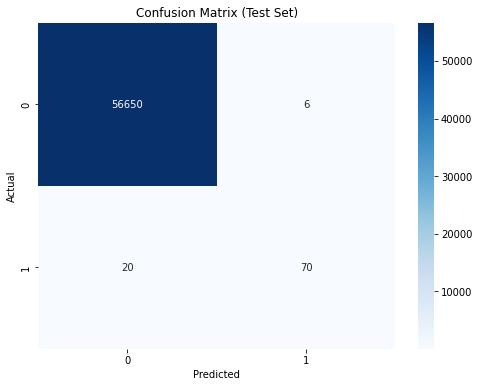

In [24]:
# Visualize the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()